In [2]:
import pandas as pd
import numpy as np

#Import information
info = pd.read_csv("F:/Internship/Dataset/Cleaner Data/Combined/info_gain-ratio.csv")
info_df = pd.DataFrame(info)

#Import our dataset
data = pd.read_csv("F:/Internship/Dataset/Cleaner Data/Combined/combined_attack_data.csv")
df = pd.DataFrame(data)

In [6]:
#Sort info gain in descending order
info_gain_desc = info.sort_values(by = 'information_gain', ascending = False)
info_gain_desc

,Attributes,information_gain,gain_ratio
47,Average Packet Size,0.332349,0.494307
49,Avg Bwd Segment Size,0.317858,0.472754
11,Bwd Packet Length Mean,0.317836,0.472722
4,Total Length of Bwd Packets,0.309126,0.459767
54,Subflow Bwd Bytes,0.308721,0.459165
...,...,...,...
40,SYN Flag Count,0.010326,0.015358
29,Fwd PSH Flags,0.010180,0.015141
58,min_seg_size_forward,0.001084,0.001613
41,RST Flag Count,0.000342,0.000509


In [7]:
#Dropping last column ece flag count coz has info gain and ratio 0 which is almost useless
info_gain_desc = info_gain_desc.drop(info_gain_desc.index[-1])

In [8]:
info_gain_desc

,Attributes,information_gain,gain_ratio
47,Average Packet Size,0.332349,0.494307
49,Avg Bwd Segment Size,0.317858,0.472754
11,Bwd Packet Length Mean,0.317836,0.472722
4,Total Length of Bwd Packets,0.309126,0.459767
54,Subflow Bwd Bytes,0.308721,0.459165
...,...,...,...
60,Active Std,0.016145,0.024013
40,SYN Flag Count,0.010326,0.015358
29,Fwd PSH Flags,0.010180,0.015141
58,min_seg_size_forward,0.001084,0.001613


In [9]:
#Sort gain ratio in descending order
gain_ratio_desc = info.sort_values(by = 'gain_ratio', ascending = False)
gain_ratio_desc

,Attributes,information_gain,gain_ratio
47,Average Packet Size,0.332349,0.494307
49,Avg Bwd Segment Size,0.317858,0.472754
11,Bwd Packet Length Mean,0.317836,0.472722
4,Total Length of Bwd Packets,0.309126,0.459767
54,Subflow Bwd Bytes,0.308721,0.459165
...,...,...,...
40,SYN Flag Count,0.010326,0.015358
29,Fwd PSH Flags,0.010180,0.015141
58,min_seg_size_forward,0.001084,0.001613
41,RST Flag Count,0.000342,0.000509


In [10]:
#Dropping last column ece flag count coz has info gain and ratio 0 which is almost useless
gain_ratio_desc = gain_ratio_desc.drop(gain_ratio_desc.index[-1])

In [11]:
gain_ratio_desc

,Attributes,information_gain,gain_ratio
47,Average Packet Size,0.332349,0.494307
49,Avg Bwd Segment Size,0.317858,0.472754
11,Bwd Packet Length Mean,0.317836,0.472722
4,Total Length of Bwd Packets,0.309126,0.459767
54,Subflow Bwd Bytes,0.308721,0.459165
...,...,...,...
60,Active Std,0.016145,0.024013
40,SYN Flag Count,0.010326,0.015358
29,Fwd PSH Flags,0.010180,0.015141
58,min_seg_size_forward,0.001084,0.001613


In [19]:
if info_gain_desc.equals(gain_ratio_desc):
    print("1")
    
#Both data set with descending order of gain ratio anf information gain are exactly same 

info_desc = info_gain_desc

1


In [36]:
#Divide the data set in two halves
midpt = len(info_desc) // 2

top_half = info_desc.iloc[:midpt,:]
lower_half = info_desc.iloc[midpt:,:]

top_feature = top_half['Attributes']
bottom_feature = lower_half['Attributes']

In [4]:
#Training and testing the data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
#Train combined data

X = data.drop(' Label',axis = 1)
Y = data[' Label']

#Split training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(Y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(Y_test, dt_predictions)

# Evaluate Random Forest
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)

# Print results
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)

Decision Tree:
Accuracy: 0.9993809313543847
Confusion Matrix:
 [[370706    157]
 [   122  79692]]

Random Forest:
Accuracy: 0.9992522360803857
Confusion Matrix:
 [[370678    185]
 [   152  79662]]


In [37]:
#Train 50% data


X = data[top_feature]
Y = data[' Label']

#Split training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(Y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(Y_test, dt_predictions)

# Evaluate Random Forest
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)

# Print results
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)

Decision Tree:
Accuracy: 0.9989859699962501
Confusion Matrix:
 [[370616    247]
 [   210  79604]]

Random Forest:
Accuracy: 0.9989194034752161
Confusion Matrix:
 [[370624    239]
 [   248  79566]]


In [39]:
#Train 50% bottom data

X = data[bottom_feature]
Y = data[' Label']

#Split training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(Y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(Y_test, dt_predictions)

# Evaluate Random Forest
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)

# Print results
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)

Decision Tree:
Accuracy: 0.9876519103482094
Confusion Matrix:
 [[367458   3405]
 [  2160  77654]]

Random Forest:
Accuracy: 0.9880734983147575
Confusion Matrix:
 [[367496   3367]
 [  2008  77806]]


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

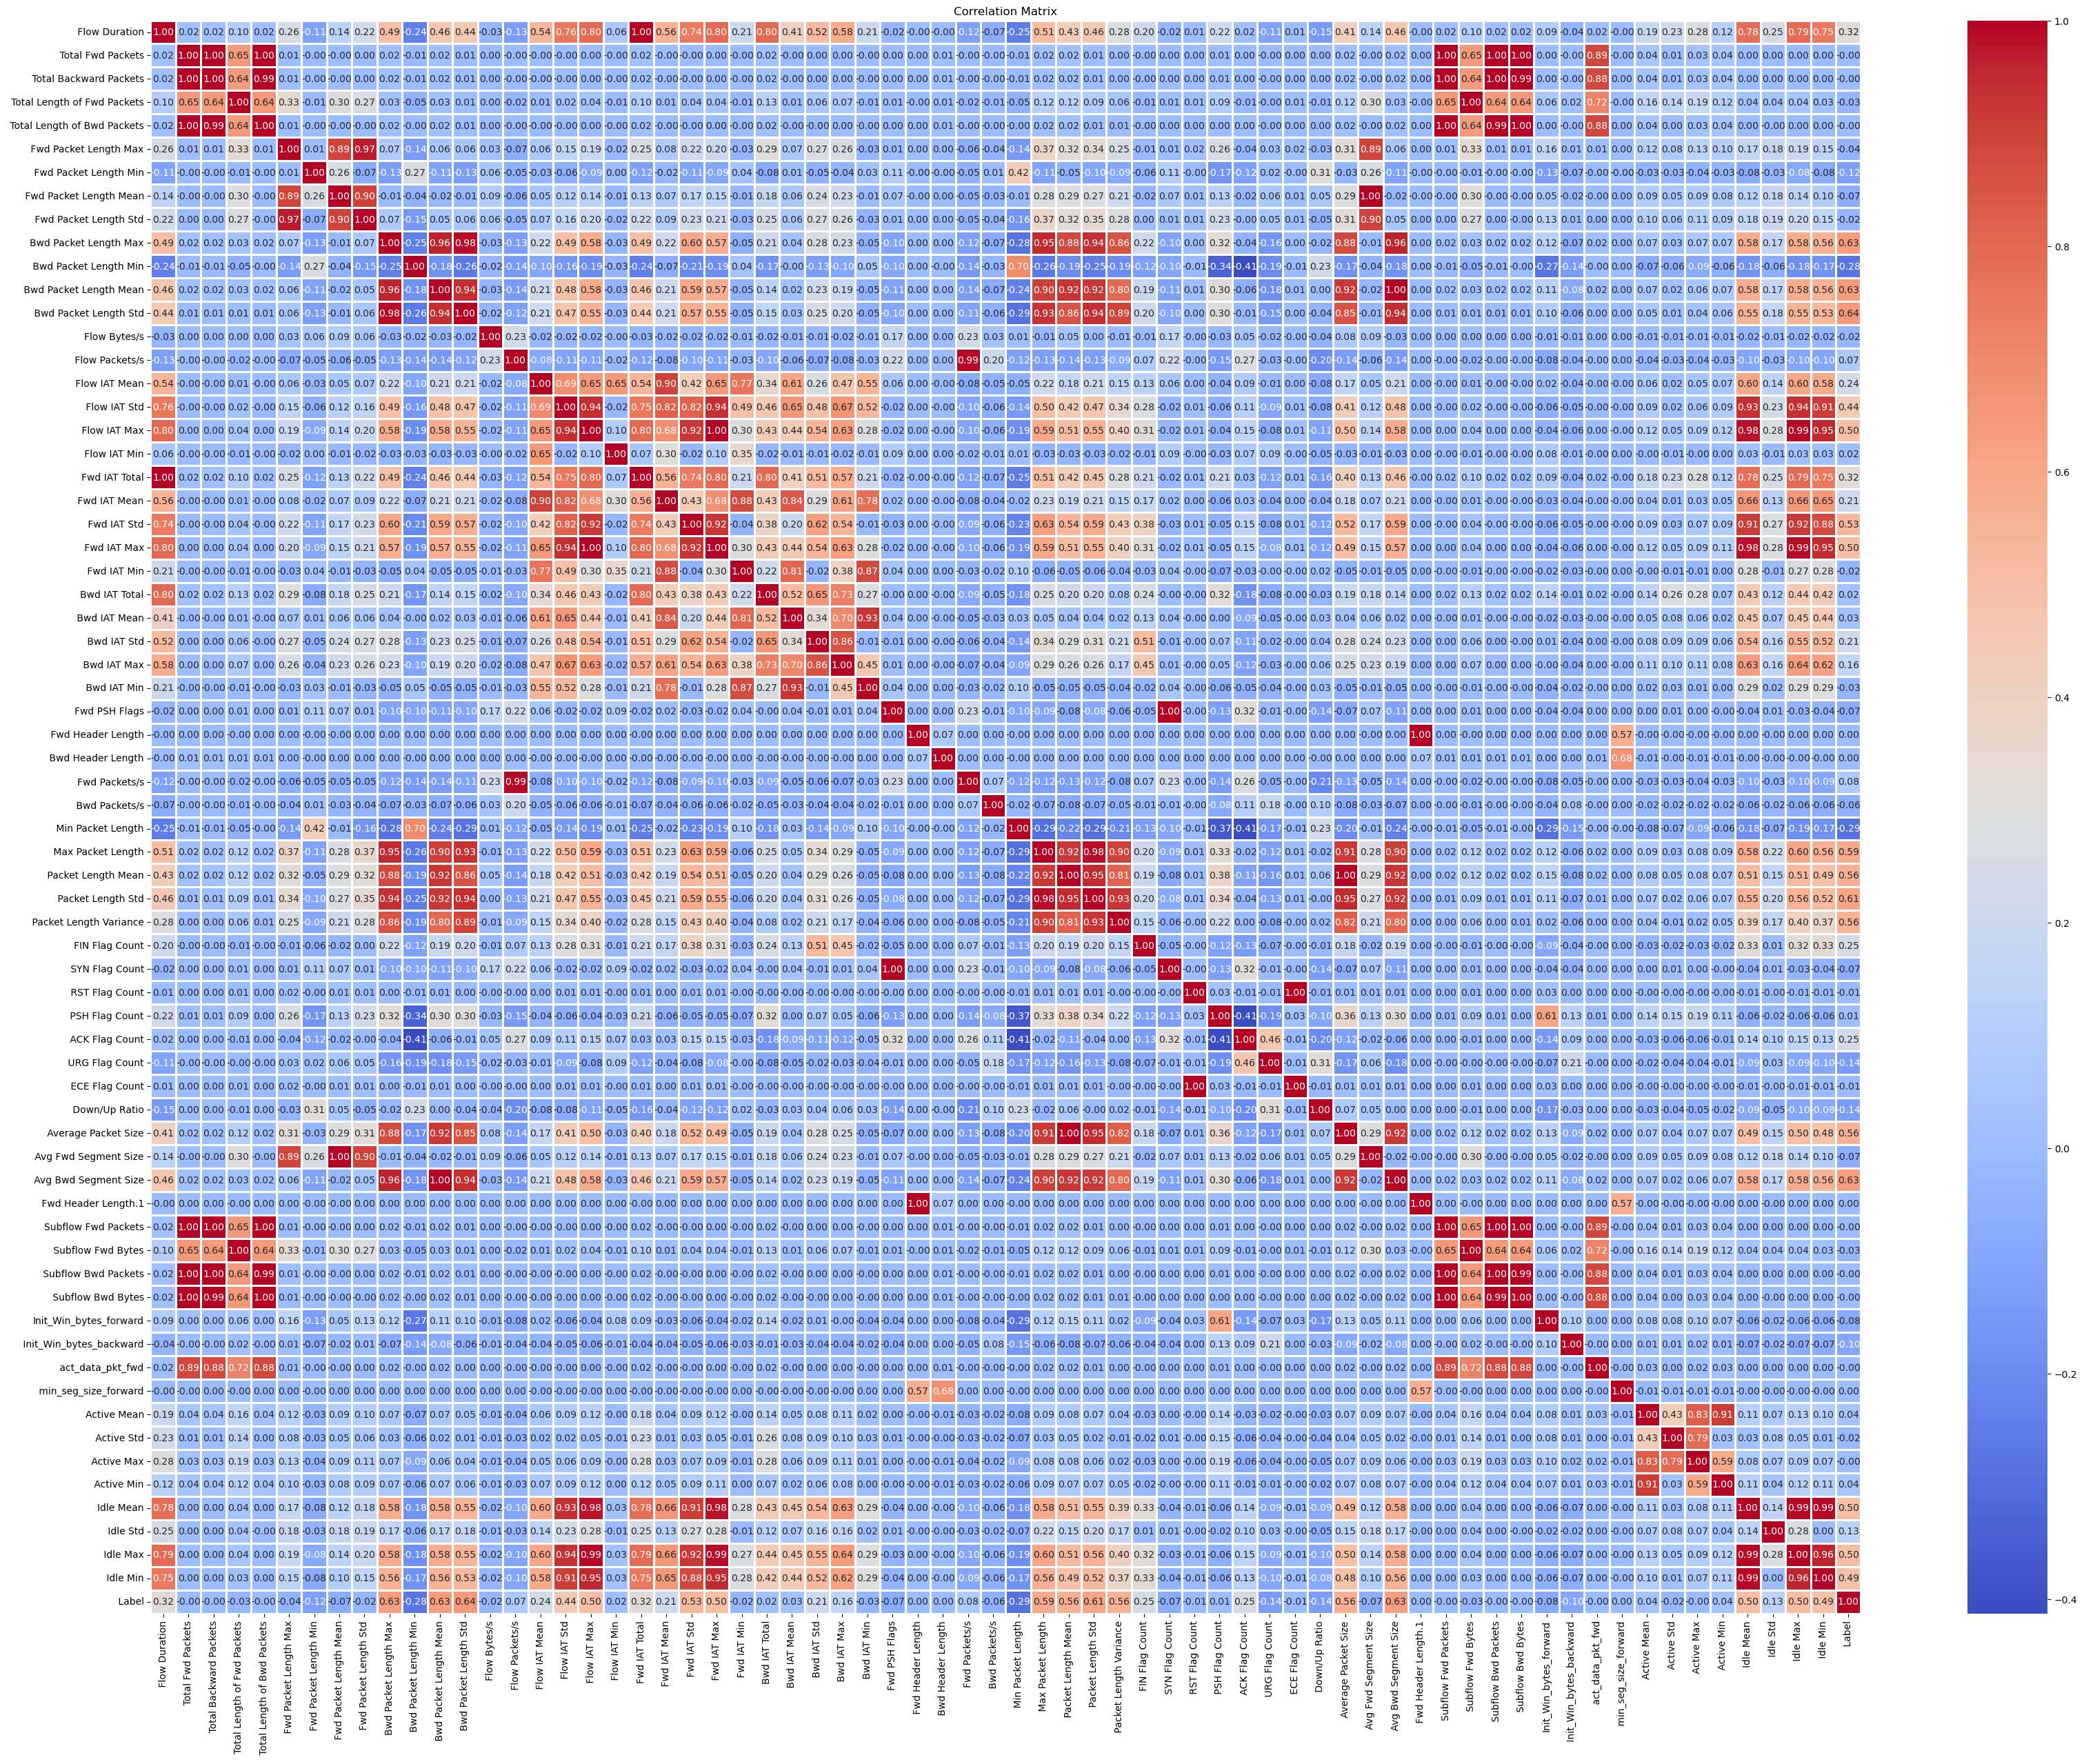

In [6]:
correlation_matrix = data.corr()

plt.figure(figsize=(40,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1.0)
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Getting the features with correlation greater than 0.1

target_corr = data.corr()[' Label'].abs().sort_values(ascending=False)
top_features = target_corr[1:28]  
selected_features = df[top_features.index]

In [10]:
selected_features.columns

Index([' Bwd Packet Length Std', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', 'Bwd Packet Length Max', ' Packet Length Std',
       ' Max Packet Length', ' Packet Length Mean', ' Average Packet Size',
       ' Packet Length Variance', ' Fwd IAT Std', ' Idle Max', ' Flow IAT Max',
       ' Fwd IAT Max', 'Idle Mean', ' Idle Min', ' Flow IAT Std',
       'Fwd IAT Total', ' Flow Duration', ' Min Packet Length',
       ' Bwd Packet Length Min', 'FIN Flag Count', ' ACK Flag Count',
       ' Flow IAT Mean', ' Fwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' URG Flag Count'],
      dtype='object')

In [13]:
#Train best features from correlation matrix

X = data[selected_features.columns]
Y = data[' Label']

#Split training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(Y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(Y_test, dt_predictions)

# Evaluate Random Forest
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)

In [14]:
# Print results
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)

Decision Tree:
Accuracy: 0.9864825584620471
Confusion Matrix:
 [[366792   4071]
 [  2021  77793]]

Random Forest:
Accuracy: 0.9867665756184585
Confusion Matrix:
 [[366844   4019]
 [  1945  77869]]


In [3]:
#Import test Data
test = pd.read_csv("F:/Internship/Dataset/Cleaner Data/Combined/fri_after_ps_testdata.csv")
test_df = pd.DataFrame(test)

In [5]:
#test data using dataset we set asid earlier

X = data.drop(' Label',axis = 1)
Y = data[' Label']

#Split training and testing data
X_test = test.drop(' Label', axis = 1)
Y_test = test[' Label']

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X, Y)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, Y)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(Y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(Y_test, dt_predictions)

# Evaluate Random Forest
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(Y_test, rf_predictions)

In [6]:
# Print results
print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)

Decision Tree:
Accuracy: 0.4435888652759913
Confusion Matrix:
 [[126781    511]
 [158676    128]]

Random Forest:
Accuracy: 0.44343856607572285
Confusion Matrix:
 [[126716    576]
 [158654    150]]
